<a href="https://colab.research.google.com/github/snowmaricano/Bigdata/blob/main/%5Bpandas_04%5D_%EC%A0%9C%EA%B3%BC%EC%A0%90_%EC%84%9C%EC%9A%B8_%EC%96%B4%EB%94%94%EC%97%90_%EC%98%A4%ED%94%88%ED%95%A0%EA%B9%8C_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.파일 다운로드

In [ ]:
!git clone https://github.com/Soyoung-Yoon/data_03

Cloning into 'data_03'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 8 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), 4.97 MiB | 3.03 MiB/s, done.


## 2.Colab에서 한글 폰트 사용하기

In [ ]:
### [230417]변경안내
# colab에서 matplotlib의 버전이 변경되면서
# koreanize_matplotlib 사용이 가능해 졌습니다.
# 아래의 설치 후, import koreanize_matplotlib 를 한 뒤 사용하시면 됩니다.

In [ ]:
!pip install koreanize-matplotlib

In [ ]:
# 사용 예시!
import matplotlib.pyplot as plt
import koreanize_matplotlib
plt.figure(figsize=(4,3))
plt.plot([-1, 0, 1, 2])
plt.xlabel('간단한 그래프')
plt.show()

In [ ]:
# <그래프 그리기 전용> - 사용할 데이터 프레임 만들기
# 1. 파일 다운로드
# 2. Colab에서 한글 폰트 사용하시 실행
# 3. 아래의 데이터 프레임 만들기 실행
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import koreanize_matplotlib

warnings.filterwarnings('ignore')

df = pd.read_csv('./data_03/bread_data.csv', encoding='cp949', dtype={'건물소유구분명': object, '전통업소지정번호': object})
bread = df[['인허가일자', '상세영업상태코드', '폐업일자', '소재지전체주소', '사업장명', '업태구분명']]
condition1 = bread['소재지전체주소'].str.split().str[0] == '서울특별시'
condition2 = bread['업태구분명'] == '제과점영업'
bread = bread[condition1 & condition2]
bread['구명'] = bread['소재지전체주소'].str.split().str[1]
bread['동명'] = bread['소재지전체주소'].str.split().str[2]
bread['폐업일자'] = bread['폐업일자'].fillna(0.0).astype('int64')
bread = bread.drop(columns=['소재지전체주소', '업태구분명'])
bread = bread.rename(columns={'상세영업상태코드': '상태코드'})
bread['설립년도'] = bread['인허가일자'] // 10000
bread['폐업년도'] = bread['폐업일자'] // 10000
nyear = 2021
bread.loc[bread['상태코드']==1,'영업기간'] = nyear - bread['설립년도'] + 1
bread.loc[bread['상태코드']==2,'영업기간'] = bread['폐업년도'] - bread['설립년도'] + 1
func = lambda x : (nyear - x['설립년도'] + 1) if x['상태코드']==1 else (x['폐업년도'] - x['설립년도'] + 1)
bread['영업기간'] = bread.apply(func, axis=1)
temp1 = bread['설립년도'].value_counts().sort_index().to_frame().T
temp2 = bread['폐업년도'].value_counts().sort_index().to_frame().T
temp = pd.concat([temp1, temp2], axis=0, join='outer')
temp = temp.fillna(0).astype('int64')
temp
# [4-25]로 가서 그래프 실행

,1952,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,0
설립년도,1,1,1,11,5,10,20,12,9,5,...,431,474,572,644,623,538,546,502,433,0
폐업년도,0,0,0,0,0,0,0,0,0,0,...,374,396,447,469,612,518,514,515,349,3955


## 3.제과점 오픈 프로젝트

In [ ]:
# [4-0] 사용라이브러리 import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 3-1.파일 읽어오기
- csv 파일 : pd.read_csv('파일이름', encoding='cp949', low_memory=False)
   - encoding='cp949' : 한글이 포함되어 있는 경우 encoding 방식을 지정
   - low_memory=False : column에 여러 type의 데이터가 섞여 있으면 DtypeWarning이 발생하며 이때, dtype option으로 타입을 명시해주거나 low_memory=False를 사용한다.


In [ ]:
# [4-1] 제과점에 대한 파일 './data_03/bread_data.csv'을
# encoding='cp949' 를 사용하여 읽어와 df라는 이름을 붙인다
# low_memory=False 또는 dtype={'건물소유구분명': object, '전통업소지정번호': object}를 사용하여 Warning를 제거할 수 있음


### 3-2.데이터 구조 확인
- DataFrame.shape : 데이터 프레임의 행, 열의 수를 tuple로 반환
- DataFrame.head(n=5) : 처음부터 n개 행의 데이터 가져오기
- DataFrame.tail(n=5) : 마지막 n개 행의 데이터 가져오기
- DataFrame.info(memory_usage='deep') : 데이터 프레임의 row 개수 및 각 column의 Non null, dtype 정보 및 메모리 사용량을 확인함

In [ ]:
# [4-2] df의 행, 열의 개수를 확인한다


In [ ]:
# [4-3] df의 첫 1개 열을 출력해 확인한다


In [ ]:
# [4-4] df의 행, 열에 대한 개수, 각 열 별 데이터 개수 및 dtype,
# 메모리 사용량을 확인합니다.


DataFrame의 한 개의 column은 Series이다.
- DataFrame[컬럼명] : 컬럼 1개를 Series로 반환함
- DataFrame[[컬럼명1, 컬럼명2, ...]] : 컬럼 목록에 있는 컬럼을 가져옴
    - 컬럼 목록에 1개의 컬럼만 있어도 DataFrame이 반환됨

Series.value_counts() : 데이터 별 개수를 Series로 반환
- NA Value가 있다면 불포함

In [ ]:
# [4-5] df의 '상세영업상태명'에 대해 값별 개수를 구합니다.


폐업    33669
영업    19011
Name: 상세영업상태명, dtype: int64

In [ ]:
# [4-6] df의 '상세영업상태코드'에 대해 값별 개수를 구합니다.
# 1: 영업, 2: 폐업



2    33669
1    19011
Name: 상세영업상태코드, dtype: int64

In [ ]:
# [4-7] df의 컬럼 중에
# '인허가일자', '상세영업상태코드', '폐업일자', '소재지전체주소', '사업장명', '업태구분명'만 가져옵니다.
# 이름을 bread로 정하고, 처음부터 3개 행을 출력해 봅니다.


,인허가일자,상세영업상태코드,폐업일자,소재지전체주소,사업장명,업태구분명
0,20130201,1,NaN,"광주광역시 서구 치평동 1177-2번지 (106,107호)",뚜레쥬르상무역점,제과점영업
1,20130318,1,NaN,광주광역시 서구 유촌동 868-1번지 (102호),뚜레쥬르광주버들마을점,제과점영업
2,20130417,1,NaN,광주광역시 서구 화정동 1611번지 101호102호103호 상가2동,파리바게뜨화정현대점,제과점영업


### 3-3.파생정보 추가

Series의 str Accessor 사용
- 세부 내용 : https://pandas.pydata.org/docs/reference/series.html#string-handling
- Series.str.split() : whitespace(공백, 탭 등)을 기준으로 문자열 분리
    - 예)  ‘서울특별시 종로구 …’  => [서울특별시, 종로구, …]
- Series.str[0] : Series가 여러 개의 요소가 있는 경우 그 첫 번째 요소

Series.unique() : 중복 데이터의 제거 후 배열로 반환, NA Value가 있다면 포함

In [ ]:
# [4-8] bread 의 '소재지전체주소' 중 시/도에 대한 정보(목록)를 추출합니다.


Boolean indexing 사용하여 조건에 맞는 데이터 가져오기
- DataFrame.loc[조건, :]
- DataFrame[조건]
- 조건은 boolean dtype이어야 하며 행의 수와 같아야 함
- 복잡한 조건 작성
    - (조건1) | (조건2)  : 조건1 또는 조건2를 만족하는 데이터
    - (조건1) & (조건2)  : 조건1, 조건2 모두 만족하는 데이터
    - ~(조건) : 조건이 거짓인 데이터

In [ ]:
# [4-9] bread에서 소재지전체주소의 처음이 '서울특별시'이면서,
# '업태구분명'이 '제과점영업'인 것만 추출합니다.


In [ ]:
# [4-10] df, bread의 행/열 정보를 확인합니다.


DataFrame에 새로운 컬럼 추가
- DataFrame['컬럼명'] = 데이터
- 데이터의 개수는 기존 다른 컬럼의 행 개수와 같아야 함


In [ ]:
# [4-11] bread의 '소재지전체주소'에서 '구명', '동명'을 추출하여
# bread에 새로운 컬럼으로 등록합니다.

# bread의 컬럼명을 출력해 '구명', '동명'이 추가되었는지 확인함


Index(['인허가일자', '상세영업상태코드', '폐업일자', '소재지전체주소', '사업장명', '업태구분명', '구명', '동명'], dtype='object')

Accessor 연습 LAB : https://colab.research.google.com/drive/1tkrP-1VWZYZ1Zl_9KrlkPBpVHWBMUlCy

Accessor 연습 Teacher : https://colab.research.google.com/drive/1Szy5ZjK7hM6E7utgPIbAgwDAxcWWpwO5

### 3-4.결측치 확인/처리

결측치는 값이 없음을 나타냄
- NaN, NaT, None 등으로 표기되며, NA Value, Missing Value 라고 함

결측치 확인
   - DataFrame.isna() : 결측치에 대해 True, 아니면 False
   - DataFrame.isnull() : DataFrame.isna()와 동일함
   - DataFrame.notna() : 결측치가 아닌 것에 대해 True, 결측치면 False
   - DataFrame.notnull() : DataFrame.isnull()과 동일함
   - Series에도 결측치 확인을 위한 isna() ~ notnull()의 메서드 있음

DataFrame.isna().sum() : 결측치에 대해 컬럼별 개수

In [ ]:
# [4-12] bread2의 각 컬럼별 결측치의 개수를 확인합니다.


결측치 채우기
- DataFrame.fillna(값) : 결측치를 특정 값으로 채움

데이터 타입 변경 방법
- Series.astype(타입)
- 타입 표시 방법 : 'int', 'int32', 'int64', 'float', 'str', 'category',  ... 등의 문자열로 지정
- np.int16, np.float32, np.datetime64, ... 등의 numpy 타입으로 지정
- numpy 타입으로 지정하기 위해서는  ```import numpy as np```  를 먼저 실행하여야 함

In [ ]:
import pandas as pd
df = pd.read_csv('./data_03/bread_data.csv',
                 encoding='cp949',
                 dtype={'건물소유구분명': object, '전통업소지정번호': object})
bread = df[['인허가일자', '상세영업상태코드', '폐업일자', '소재지전체주소', '사업장명', '업태구분명']]
condition1 = bread['소재지전체주소'].str.split().str[0] == '서울특별시'
condition2 = bread['업태구분명'] == '제과점영업'
bread = bread[condition1 & condition2]
temp = bread['소재지전체주소'].str.split()
bread['구명'] = temp.str[1]
bread['동명'] = temp.str[2]

In [ ]:
# [4-13] bread의 '폐업일자'에 대해 결측치인 것을 0.0으로 채우기 한 뒤,
# 데이터 타입을 'int64'로 수정합니다.


인허가일자        int64
상세영업상태코드     int64
폐업일자         int64
소재지전체주소     object
사업장명        object
업태구분명       object
구명          object
동명          object
dtype: object

In [ ]:
# [4-14] bread의 전체 결측치의 개수를 하나의 정수로 확인합니다.


DataFrame에서 컬럼을 제거 함
- DataFrame.drop(columns=['컬럼명1', '컬럼명2', ...])
- DataFrame.drop(['컬럼명1', '컬럼명2', ...], axis=1)


In [ ]:
# [4-15] bread에서 '소재지전체주소' 및 '업태구분명' 컬럼을 제거한 뒤, shape을 확인합니다.


In [ ]:
# [4-16] bread의 첫 3개 행을 확인합니다.


컬럼이름 변경하기
- DataFrame.rename(columns={'변경전이름':'변경후이름', ...})
- DataFrame.rename({'변경전이름':'변경후이름', ...}, axis=1)

In [ ]:
# [4-17] bread의 '상세영업상태코드'라는 컬럼명을 '상태코드'로 변경한 뒤,
# 첫 2개의 행을 확인합니다.


CSV 파일로 저장하기
- DataFrame.to_csv('파일이름', index=False) : index를 제외한 내용을 csv 파일로 저장함

In [ ]:
# [4-18] bread를 'bread_after.csv' 파일로 index를 제외하고 저장합니다.


In [ ]:
# [4-19] 'bread_after.csv' 파일을 읽어 bread라는 이름으로 저장합니다.


,인허가일자,상태코드,폐업일자,사업장명,시군구명,동리명
0,20010713,1,0,파리바게뜨(역촌역점),은평구,대조동
1,20030507,1,0,파리바게뜨,은평구,갈현동


### 3-5.설립년도,폐업년도 분석

Series의 연산
- Series는 스칼라값과 연산 시 각 값과 스칼라 값의 연산이 이루어짐
- 결과는 Series가 됨

In [ ]:
# [4-20] bread에 '설립년도' 및 '폐업년도' 컬럼을 추가합니다.
# '인허가일자'//10000, '폐업일자 // 10000 을 사용하여 구합니다.
# 두 개의 컬럼이 추가된 bread의 첫 2개 행을 확인합니다.


In [ ]:
# [4-21] bread에 '영업기간' 컬럼을 추가합니다
# '영업기간'은 '상태코드'가 1(=영업)인 경우 2021 - 설립년도 -1
# '상태코드'가 2(=폐업)인 경우 폐업년도 - 설립년도 + 1로 계산합니다.


Series를 DataFrame으로 만들기
- pd.DataFrame(Series)
- Series.to_frame()

DataFrame의 index 정렬하기
- DataFrame.sort_index() : 오름차순 정렬
- DataFrame.sort_index(ascending=False) : 내림차순 정렬

DataFrame의 전치행렬 구하기
- DataFrame.T


In [ ]:
# [4-22] bread의 '설립년도'별 데이터 수를 구해 년도별로 정렬하고,
# DataFrame으로 변경하여 전치행렬을 구해 temp1 이름을 부여해 출력합니다.


In [ ]:
# 버전에 따른 추가내용 - 만일 설립년도를 행의 index로 사용하고 싶다면  temp1 출력전에 index를 수정해 주어야 합니다.

temp1.index.name = ''
temp1.index =['설립년도']
temp1

In [ ]:
# [4-23] bread의 '폐업년도'별 데이터 수를 구해 년도별로 정렬하고,
# DataFrame으로 변경하여 전치행렬을 구해 temp2 이름을 부여해 출력합니다.


여러 개의 데이터프레임 합치기
- pd.concat([DataFrame1, DataFrame2, ...])
- DataFrame의 목록에 있는 순서대로 위 -> 아래 방향으로 합쳐 한 개 DataFrame 반환

In [ ]:
# [4-23] temp1, temp2를 합쳐서 temp라고 이름 붙입니다.


In [ ]:
# [4-24] temp의 결측치를 0으로 채우기 한 뒤, 'int64'로 변경합니다.


#### 그래프 그리기

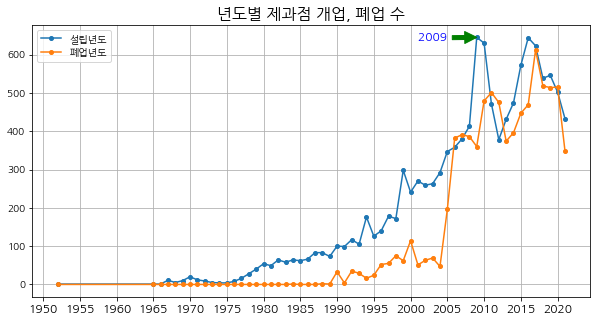

In [ ]:
# [4-25] 년도별 제과정 개업, 폐업에 대한 선 그래프 그리기
import koreanize_matplotlib



### 3-6.평균 영업기간 분석

특정 문자열이 포함된 행 가져오기
- Series.str.contains(문자열) : 문자열이 포함된 행은 True, 아니면 False인 Series 반환
- DataFrame.loc[조건, :] : 조건이 True인 행만 가져오기

In [ ]:
# [4-26] bread에서 '사업장명' 컬럼을 사용하여
# '파리바게트', '파리바게뜨' 이름인 곳을 뽑아 paris로 이름 붙입니다.


In [ ]:
# [4-27] bread에서 '사업장명' 컬럼을 사용하여
# '뚜레쥬르' 이름인 곳을 뽑아 tous로 이름 붙입니다.


통계값 알아보기
- Series.count() : 개수
- Series.sum() : 합계
- Series.mean() : 평균
- Series.std() : 표준편차
- Series.var() : 분산
- Series.median() : 중앙값
- Series.mode() : 최빈값
- Series.cumsum() : 누적합
- Series.quantile([0.25, 05, 0.75]) : 분위수

In [ ]:
# [4-28] 설립년도가 2000년 이후이면서 영업 중인 곳의 영업기간 정보를 구합니다.
# paris, tous에 대해 각각 구해서 temp1, temp2로 이름 붙입니다.

# temp1, temp2의 평균을 구해 이름을 comp로 하는 DataFrame으로 만듭니다.
# index => ['파리바게트', '뚜레쥬르'], columns => ['영업']


In [ ]:
# [4-29] 설립년도 2000년 이후이면서 폐업한 곳의 영업기간 정보를 구합니다.
# paris, tous에 대해 각각 구해서 temp1, temp2로 이름 붙입니다.

# temp1, temp2의 평균을 구해 comp에 '폐업' 컬럼으로 추가합니다.


In [ ]:
# [4-30] 파리바게트, 뚜레쥬르가 아닌 다른 사업장에 대한 정보를 찾아 other로 이름 붙입니다.

# other의 행, 열 정보를 확인합니다.


In [ ]:
# [4-31] other의 2000년 이후 설립된 곳의 영업, 폐업 사업장을 구한 뒤
# temp1, temp2 이름을 붙입니다.


# temp1, temp2의 평균을 구해 comp 에 '나머지' 행으로 추가합니다.

# DataFrame.append 는 pandas 버전이 높아져서 pd.concat()을 사용해야 합니다.
comp = pd.concat([comp, temp])  # 를 사용합니다.

### 3-7.폐업비율 분석


In [ ]:
# [4-32] paris에서 영업 중인 곳에 대해 '시군구명'별 개수를 구해 DataFrame으로 변환하고
# temp로 이름 붙인 뒤, 첫 2개 행을 출력한다


 DataFrame.reset_index()
 - index의 내용을 columns로 이동함

In [ ]:
# [4-33] paris에서 폐업한 곳에 대해 '구명'별 개수를 구해
# temp에 '폐업'이라는 컬럼으로 추가하고,
# reset_index()를 사용하여 index를 columns로 사용되도록 한다. (temp2로 다시 저장)




DataFrame의 모든 컬럼이름 변경
- DataFrame.columns = [컬럼이름1, 컬럼이름2, ...]
- 기존 컬럼의 개수와 같아야 함

In [ ]:
# [4-34] temp2의 컬럼명을 ['구', '영업', '폐업']으로 변경한다


# temp2의 첫 2개 행을 출력한다


In [ ]:
# [4-35] temp2에 '폐업비율' 컬럼을 추가한다
# 폐업비율 = 폐업 / (폐업 + 영업) * 100

# temp2의 첫 3개 행을 출력한다


데이터 정렬
- DataFrame.sort_values('컬럼이름') : 주어진 컬럼을 기준으로 데이터를 오름차순 정렬
- DataFrame.sort_values('컬럼이름', ascending=False) : 내림차순 정렬
- DataFrame.sort_values(['컬럼이름1', '컬럼이름2'..]) : 다차 정렬

In [ ]:
# [4-36] temp2를 폐업비율을 기준으로 오름차순 정렬하여 TOP5를 출력한다
# 폐업비율이 가장 작은 곳은 은평구, 동대문구 ... 등으로 정보를 찾게 됨


Series.quantile([rate1, rate2, ...])
- 데이터를 순서대로 나열했을 때, 특정 비율 위치의 값을 구함
- 0 : 가장 작은 것의 값
- 1 : 가장 큰 것의 값

Series.quantile([0.3, 0.9])
- 0.3 : 하위 30% 위치
- 0.9 : 상위 10% 위치

In [ ]:
# [4-37] temp에서 폐업비율 하위 30%인 곳을 구하시오.


In [ ]:
# [4-38] temp에서 폐업비율 상위 20%인 곳을 구하시오.


### 3-8.시각화

In [ ]:
## 그래프만 그리는 경우 목차에서 1, 2 번 + DataFrame 만들기 수행하신 뒤 다음을 수행하시면 됩니다.

In [ ]:
# [4-39] 파리바게트의 구별 영업, 폐점장 수 구하기
paris = bread.loc[bread['사업장명'].str.contains('파리바게'), :]
data = pd.DataFrame()
data['영업'] = paris.loc[paris['상태코드']==1, '구명'].value_counts().to_frame()
data['폐업'] = paris.loc[paris['상태코드']==2, '구명'].value_counts()
data.head()

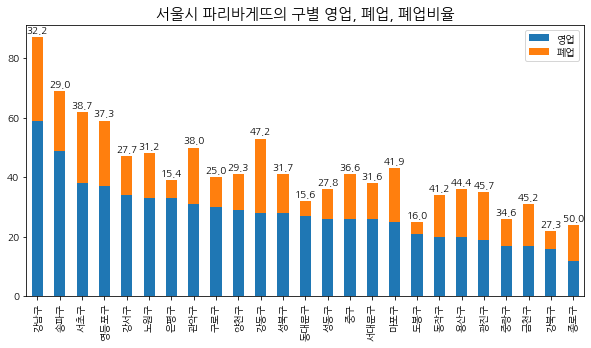

In [ ]:
# [4-40] 누적 bar 그래프 그리기
import koreanize_matplotlib



In [ ]:
# [4-41] bread를 사용하여 은평구에서 영업 중인 동별 빵집 개수를 구해 봅니다


진관동    30
응암동    24
대조동    20
신사동    17
불광동    17
역촌동    16
갈현동    15
녹번동    12
구산동    11
증산동     8
수색동     3
Name: 동리명, dtype: int64

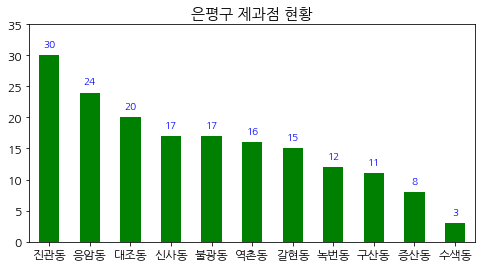

In [ ]:
# [4-42] 은평구의 동별 빵집 개수를 그래프로 표시해 봅니다.


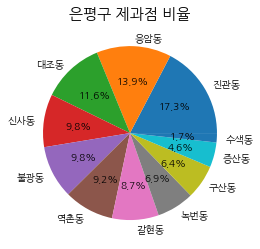

In [ ]:
# [4-43] 은평구의 동별 빵집 비율을 원행 그래프로 표시해 봅니다.



In [ ]:
"파리바게뜨, 은평구 성공적!"